In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path='d.csv'
data = pd.read_csv(path)

data

,Predictor variable,response variable
0,9.1,0.99523
1,8.0,0.99007
2,9.1,0.99769
3,8.4,0.99386
4,6.9,0.99508
...,...,...
95,7.8,0.99620
96,10.2,0.99760
97,6.1,0.99464
98,7.3,0.99830


In [4]:
X= data['Predictor variable']
Y= data['response variable']
m_numpy, b_numpy=np.polyfit(X,Y,1)
print(f"linear regression with numpy. slope:{m_numpy}. Intercept: {b_numpy}")

linear regression with numpy. slope:0.0007777711241847876. Intercept: 0.9903497091968221


In [5]:
def pred_numpy(m, b, X):
    Y= m * X + b
    
    return Y

In [6]:
X_pred= np.array([50, 120, 280])
Y_pred_numpy= pred_numpy(m_numpy, b_numpy, X_pred)

print(f"predictor variable:\n{X_pred}")
print(f"Predictions of response variable using NumPy linear regression:\n{Y_pred_numpy}")

predictor variable:
[ 50 120 280]
Predictions of response variable using NumPy linear regression:
[1.02923827 1.08368224 1.20812562]


In [12]:
X_norm= (X-np.mean(X))/np.std(X)
Y_norm= (Y-np.mean(Y))/np.std(Y)

In [13]:
def E(m, b, X, Y):
    return 1/(2*len(Y))*np.sum((m*X + b - Y)**2)

In [14]:
def dEdm(m, b, X, Y):
    res= 1/len(Y)*np.dot(m*X+b-Y, X)
    
    return res

def dEdb(m, b, X, Y):
    res= 1/len(Y)*np.sum(m*X+b-Y)
    
    return res

print(dEdm(0,0,X_norm,Y_norm))
print(dEdb(0,0,X_norm,Y_norm))
print(dEdm(1,5,X_norm,Y_norm))
print(dEdb(1,5,X_norm,Y_norm))

-0.6550644263543882
5.965901384019645e-14
0.344935573645614
5.000000000000061


In [23]:
def dEdm(m, b, X, Y):
    return 2/len(Y)*np.dot(m*X+b-Y, X)
    
    return res

def dEdb(m, b, X, Y):
    return 2/len(Y)*np.sum(m*X+b-Y)
    
def batch_grad_des(X,Y,learning_rate,iterations):
    m=0
    b=0
    cost_history=[]
    for i in range(iterations):
        m=m-learning_rate * dEdm(m,b,X,Y)
        b=b-learning_rate * dEdb(m,b,X,Y)
        
        cost=np.mean((m*X+b-Y)**2)
        cost_history.append(cost)
    
    return m,b,cost_history

learning_rate_batch=0.5
iterations_batch=1000

m_batch, b_batch, cost_history_batch=batch_grad_des(X_norm, Y_norm, learning_rate_batch, iterations_batch)

print('batch gradient descent-coefficient')
print('slope (m): ', m_batch)
print('intercept (b):', b_batch)

batch gradient descent-coefficient
slope (m):  0.6550644263543879
intercept (b): -5.992983886926595e-14


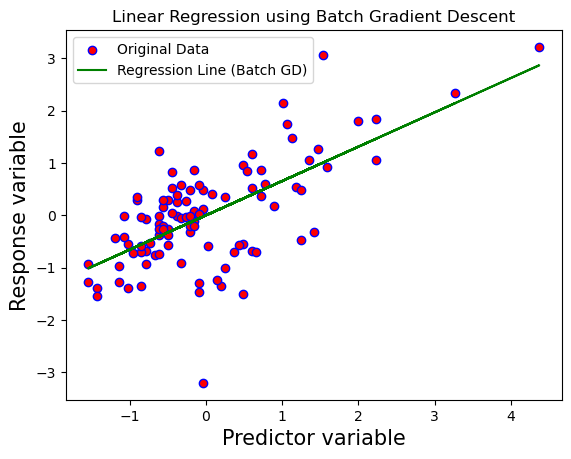

In [24]:
plt.scatter(X_norm, Y_norm, color="r", edgecolor="b", label="Original Data")
plt.plot(X_norm, m_batch*X_norm + b_batch, color="g", label="Regression Line (Batch GD)")
plt.xlabel('Predictor variable', fontsize=15)
plt.ylabel("Response variable", fontsize=15)
plt.title("Linear Regression using Batch Gradient Descent")
plt.legend()
plt.show()

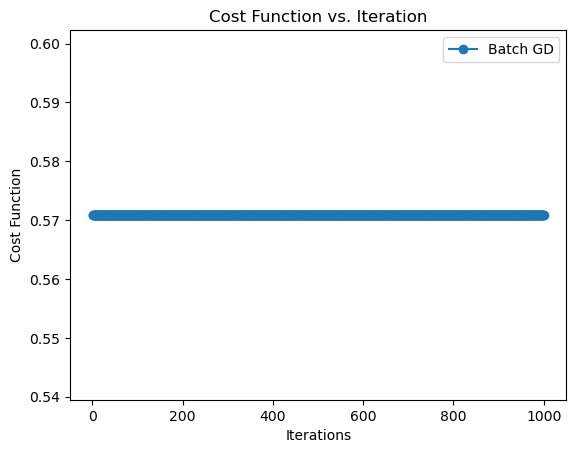

In [25]:
plt.plot(range(1, iterations_batch + 1), cost_history_batch, label='Batch GD', marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Iteration')
plt.legend()
plt.show()

In [32]:
def dEdm(m, b, x, y):
    return 2 * x * (m*x + b - y)

def dEdb(m, b, x, y):
    return 2 * (m*x + b - y)

def stochastic_gradient_descent(X, Y, learning_rate, iterations):
    m = 0
    b = 0
    cost_history = []

    for i in range(iterations):
        for j in range(len(Y)):
            m = m - learning_rate * dEdm(m, b, X[j], Y[j])
            b = b - learning_rate * dEdb(m, b, X[j], Y[j])

        cost = np.mean((m*X + b - Y)**2)
        cost_history.append(cost)

    return m, b, cost_history

learning_rate_stochastic = 0.01
iterations_stochastic = 1000

m_stochastic, b_stochastic, cost_history_stochastic = stochastic_gradient_descent(X_norm, Y_norm, learning_rate_stochastic, iterations_stochastic)

print("Stochastic Gradient Descent - Coefficients:")
print("Slope (m):", m_stochastic)
print("Intercept (b):", b_stochastic)

Stochastic Gradient Descent - Coefficients:
Slope (m): 0.633266587828981
Intercept (b): 0.04594171242258456


In [31]:
def dEdm(m, b, X, Y):
    return 2/len(Y) * np.dot((m*X + b - Y), X)

def dEdb(m, b, X, Y):
    return 2/len(Y) * np.sum(m*X + b - Y)

def mini_batch_gradient_descent(X, Y, learning_rate, batch_size, iterations):
    m = 0
    b = 0
    cost_history = []

    for i in range(iterations):
        # Randomly shuffle the data
        permutation = np.random.permutation(len(Y))
        X_shuffled = X[permutation]
        Y_shuffled = Y[permutation]

        for j in range(0, len(Y), batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            Y_batch = Y_shuffled[j:j+batch_size]
            m = m - learning_rate * dEdm(m, b, X_batch, Y_batch)
            b = b - learning_rate * dEdb(m, b, X_batch, Y_batch)

        # Calculate and store the cost
        cost = np.mean((m*X + b - Y)**2)
        cost_history.append(cost)

    return m, b, cost_history

learning_rate_mini_batch = 0.5
batch_size = 20
iterations_mini_batch = 500
m_mini_batch, b_mini_batch, cost_history_mini_batch = mini_batch_gradient_descent(X_norm, Y_norm, learning_rate_mini_batch, batch_size, iterations_mini_batch)

print("Mini-Batch Gradient Descent - Coefficients:")
print("Slope (m):", m_mini_batch)
print("Intercept (b):", b_mini_batch)


Mini-Batch Gradient Descent - Coefficients:
Slope (m): 0.5925989399697175
Intercept (b): -0.06345123860308816


In [29]:
learning_rate_mini_batch = 0.1
batch_size_mini_batch = 20
iterations_mini_batch = 1000
m_mini_batch, b_mini_batch, cost_history_mini_batch = mini_batch_gradient_descent(X_norm, Y_norm, learning_rate_mini_batch, batch_size_mini_batch, iterations_mini_batch)


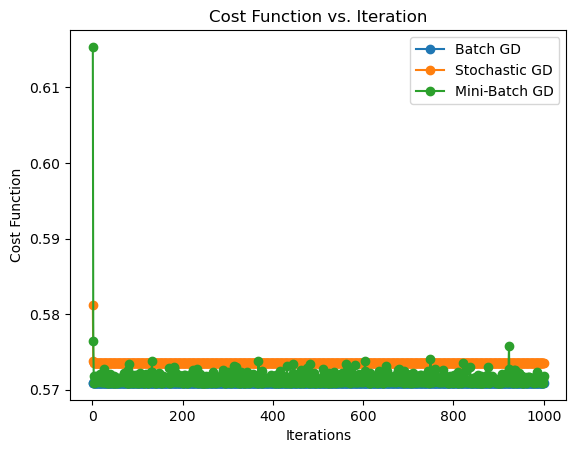

In [30]:
plt.plot(range(1, iterations_batch + 1), cost_history_batch, label='Batch GD', marker='o')
plt.plot(range(1, iterations_stochastic + 1), cost_history_stochastic, label='Stochastic GD', marker='o')
plt.plot(range(1, iterations_mini_batch + 1), cost_history_mini_batch, label='Mini-Batch GD', marker='o')

plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Iteration')
plt.legend()
plt.show()